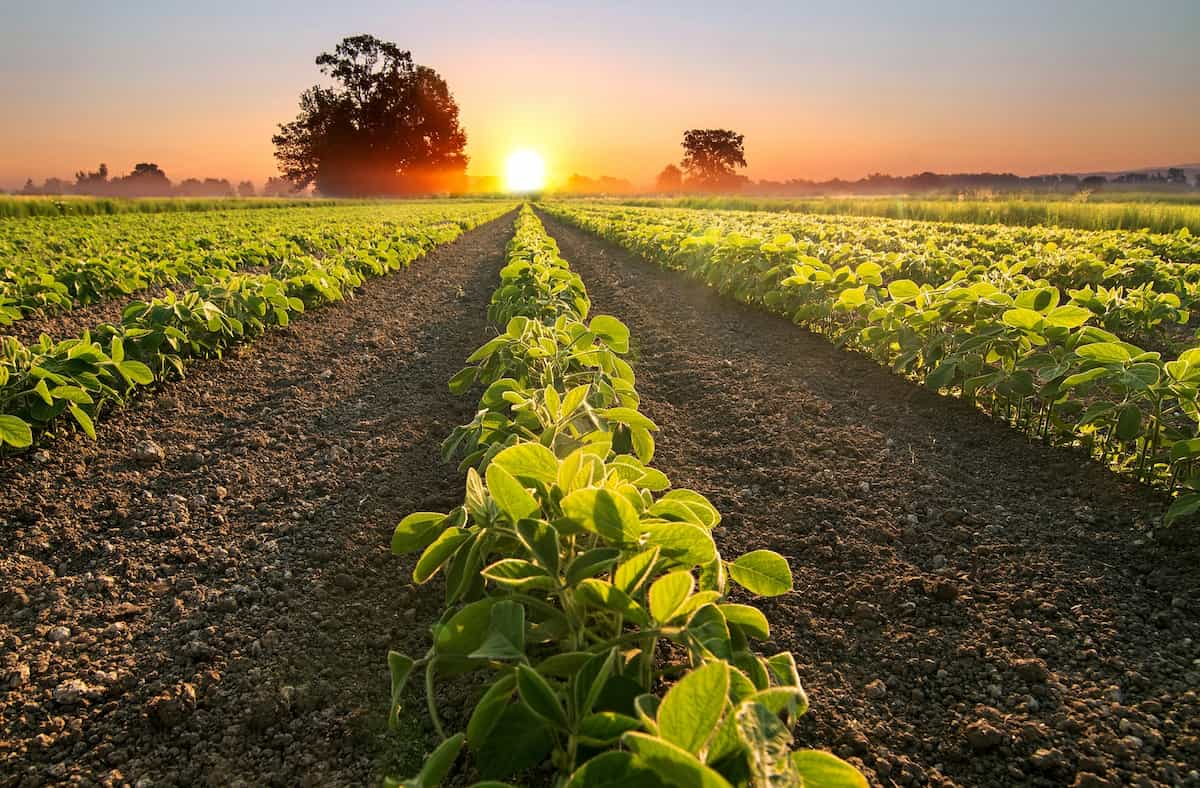

**This project, part of the Innovative AI Challenge 2024, focuses on Challenge 1: Developing AI Models to Increase Agricultural Productivity. The goal is to predict Crop Yield (kg/ha) using features like 🌧️ Rainfall, 🌱 Soil Type, and 🚜 Irrigation Area, and to build a robust regression model for accurate predictions.**

[Github Link](https://github.com/husanbano123/AI-in-agriculture)

 **🌾 Welcome to Crop Yield Predictor 🌦️**

[Crop Yield Predictor](https://ai-in-agriculture-deahzvcug7nuh9rcf4babh.streamlit.app/)

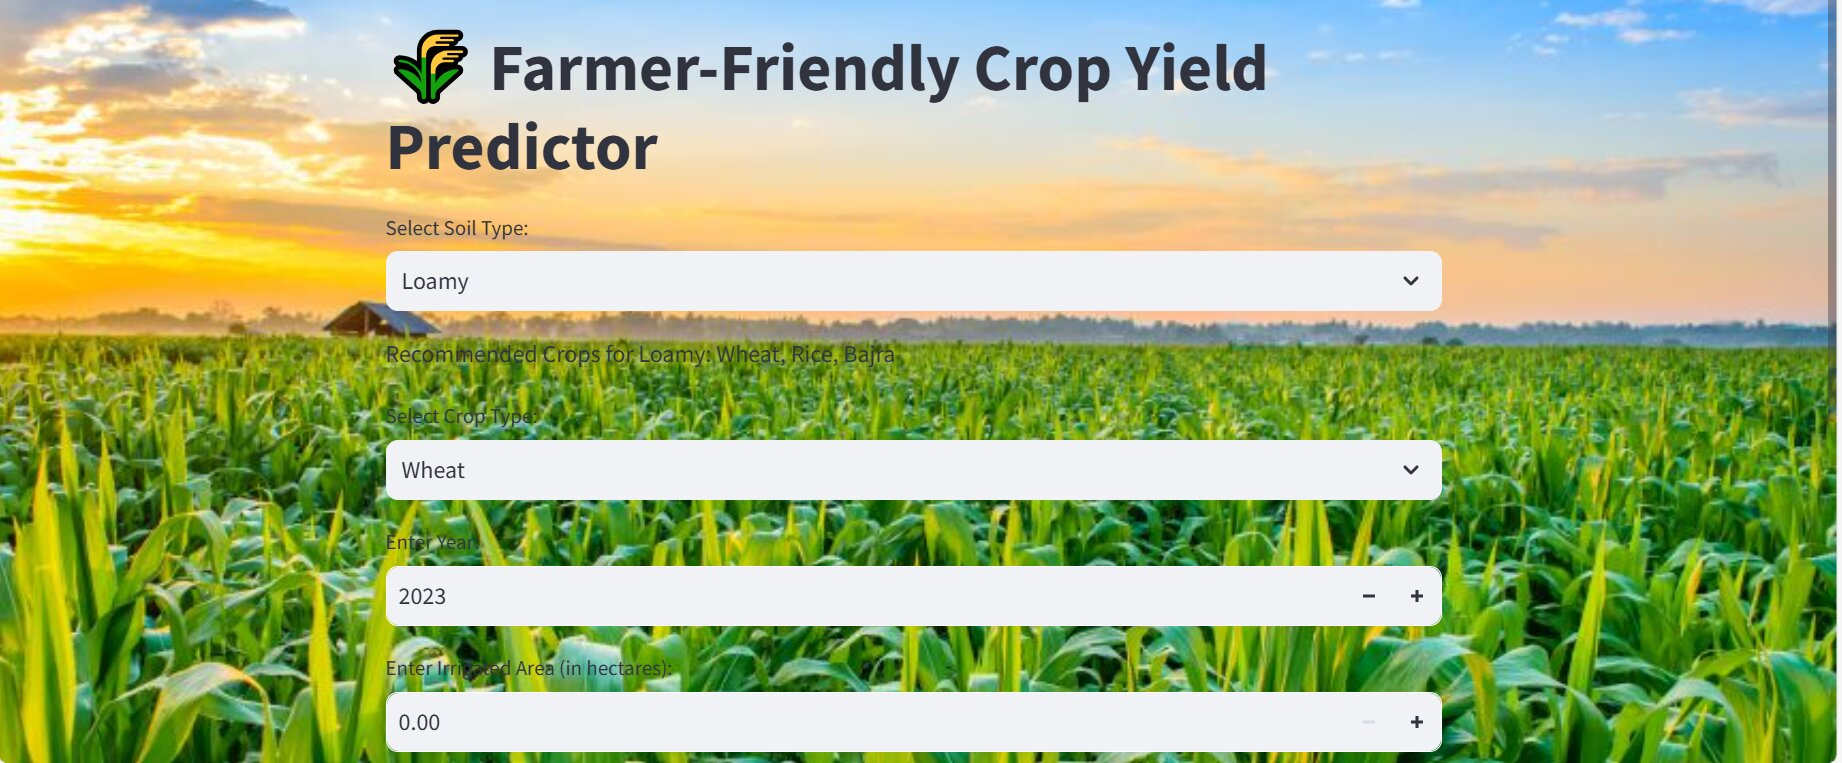








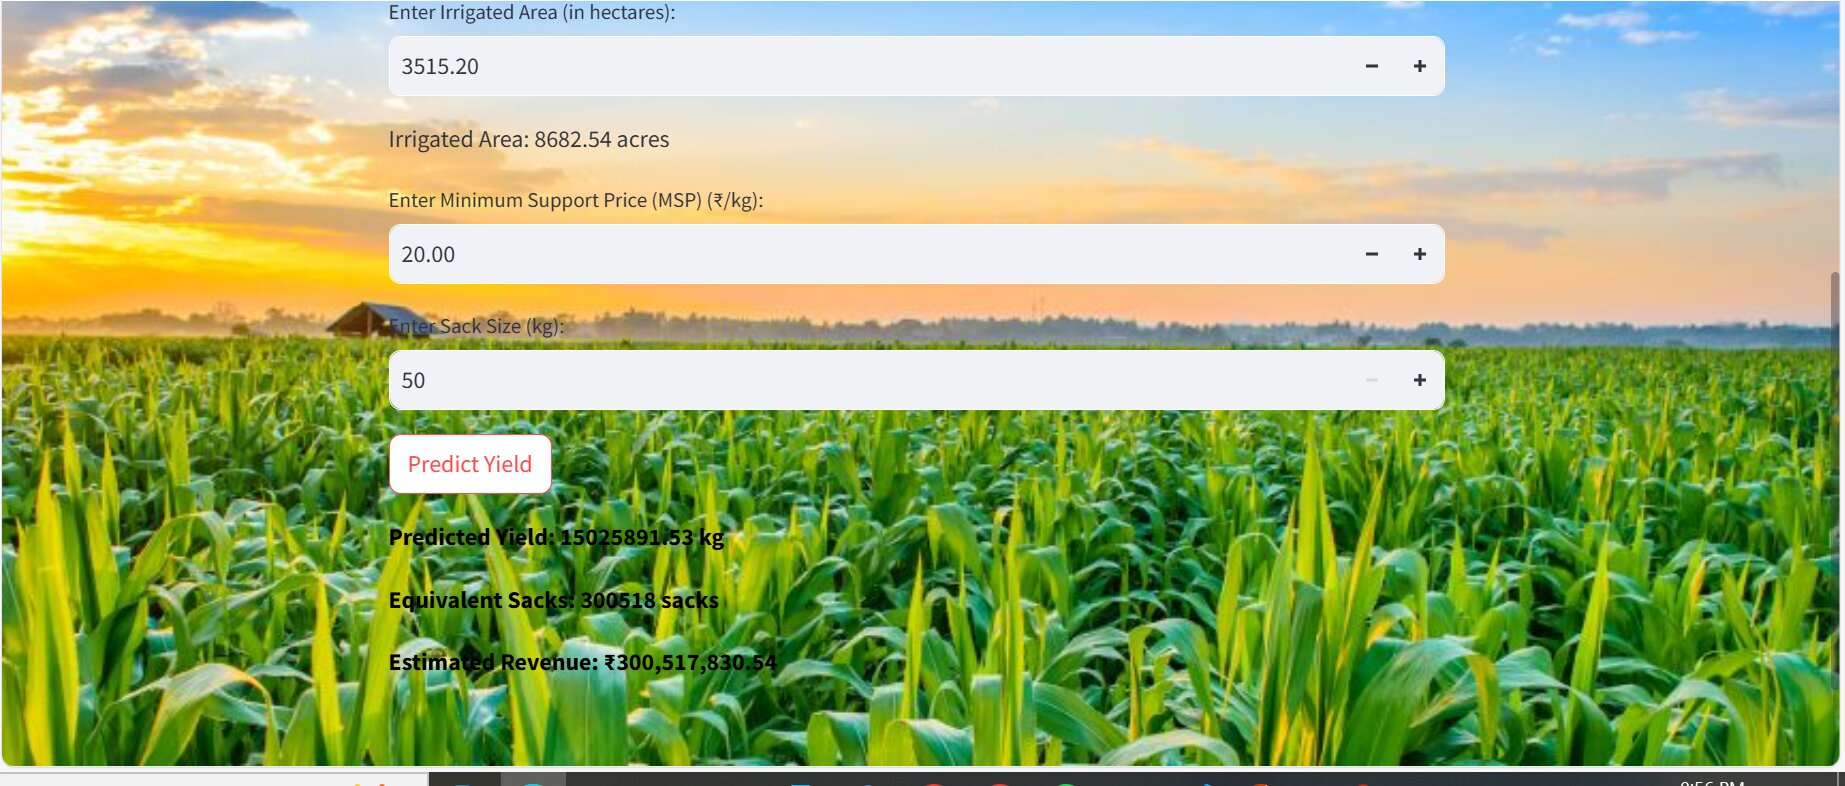

 # **🌾 Introduction - Part 3**
 
This notebook showcases the final part of the Innovative AI Challenge 2024, where we developed an AI model to predict Crop Yield (kg/ha) using features like 🌧️ Rainfall, 🌱 Soil Type, and 🚜 Irrigation Area.

- Key Highlights:
  
**Model Performance:**

**MSE: 43,991.71**

**R² Score: 98.60%**

**Performed comprehensive EDA and visualizations 📊 to uncover insights**

**Streamlit UI:**

Farmers can input Soil Type, Crop Type, Year, Irrigated Area, MSP, and Sack Size to get predictions for Crop Yield, Sacks, and Revenue.

**Deliverables:**

GitHub link with the full code and A screenshot showcasing the Streamlit UI and its outputs..

**This project demonstrates the potential of AI in agriculture, providing actionable insights and practical tools for farmers. 🌱✨**


# **🧠 Data Understanding:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
train_data=pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/train.csv')
test_data=pd.read_csv('/kaggle/input/innovative-ai-challenge-2024/test.csv')

In [3]:
print('train_data: ',train_data.shape)
print('test_data: ',test_data.shape)

train_data:  (55, 8)
test_data:  (8, 7)


In [4]:
print('train_data: ',train_data.columns)
print('test_data: ',test_data.columns)

train_data:  Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')
test_data:  Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area'],
      dtype='object')


In [5]:
train_data.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


**🔍 Explore Columns and Data Types**

- Column description:
🆔 id: A unique identifier for each data point.

📅 Year: The year when the data was collected (e.g., 2020, 2002).

🗺️ State: The state or region where the data was recorded (e.g., Punjab, Maharashtra).

🌾 Crop_Type: The type of crop grown (e.g., Rice, Wheat, Bajra).

🌧️ Rainfall: The average annual rainfall in the region (measured in mm).

🌱 Soil_Type: The type of soil in the region (e.g., Loamy, Sandy, Clay).

🚜 Irrigation_Area: The area of irrigated land in thousand hectares.

📈 Crop_Yield (kg/ha): The target variable representing the crop yield in kilograms per hectare (numeric value).

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [7]:
train_data.drop(columns=['id'],inplace=True)

In [8]:
train_data

,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


**🚨 Missing Values and Duplicate Values**

In [9]:
train_data.isnull().sum()

Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

**No missing values across any of the columns. This ensures that the data is clean and ready for exploratory data analysis (EDA) and model building**

In [10]:
train_data.duplicated().sum()

0

**🔢 Numerical and Categorical Columns**

In [11]:
target_col='Crop_Yield (kg/ha)'
num_col=train_data.select_dtypes(include=['number']).columns
cat_col=train_data.select_dtypes(include=['object']).columns
print("Target Columns: ",target_col)
print("\nNumrical Column: ",num_col.tolist())
print("\nCategorical Column: ",cat_col.tolist())

Target Columns:  Crop_Yield (kg/ha)

Numrical Column:  ['Year', 'Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)']

Categorical Column:  ['State', 'Crop_Type', 'Soil_Type']


In [12]:
num_data=train_data.select_dtypes(include=['number'])
cat_data=train_data.select_dtypes(include=['object'])

In [13]:
print('Numerical Data Distribution!')
num_data.describe().round(2).T

Numerical Data Distribution!


,count,mean,std,min,25%,50%,75%,max
Year,55.0,2009.53,6.39,2000.0,2004.0,2009.0,2015.00,2021.0
Rainfall,55.0,473.88,106.84,218.9,391.9,459.5,561.40,662.8
Irrigation_Area,55.0,2082.21,1495.19,1.2,5.5,2721.8,3393.25,3515.2
Crop_Yield (kg/ha),55.0,3079.42,1706.61,0.0,985.5,3943.0,4305.50,5188.0


In [14]:
print("Categorical Data Dsicription!")
cat_data.describe().T

Categorical Data Dsicription!


,count,unique,top,freq
State,55,1,Punjab,55
Crop_Type,55,3,Wheat,19
Soil_Type,55,2,Loamy,37


In [15]:
for c in cat_data:
    col_count=train_data[c].nunique()
    print(f'{c} has {col_count} unique values.')
    print("**"*20)

State has 1 unique values.
****************************************
Crop_Type has 3 unique values.
****************************************
Soil_Type has 2 unique values.
****************************************


In [16]:
for i in cat_col:
    cat_value=train_data[i].value_counts()
    print(f'value count for {i} is :')
    print(cat_value)
    print("-"*20)

value count for State is :
State
Punjab    55
Name: count, dtype: int64
--------------------
value count for Crop_Type is :
Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64
--------------------
value count for Soil_Type is :
Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64
--------------------


 # **🔍📈 Exploratory Data Analysis (EDA)**

**Univariate Analysis 📊✨**

**1.Distribution of Numerical Column**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


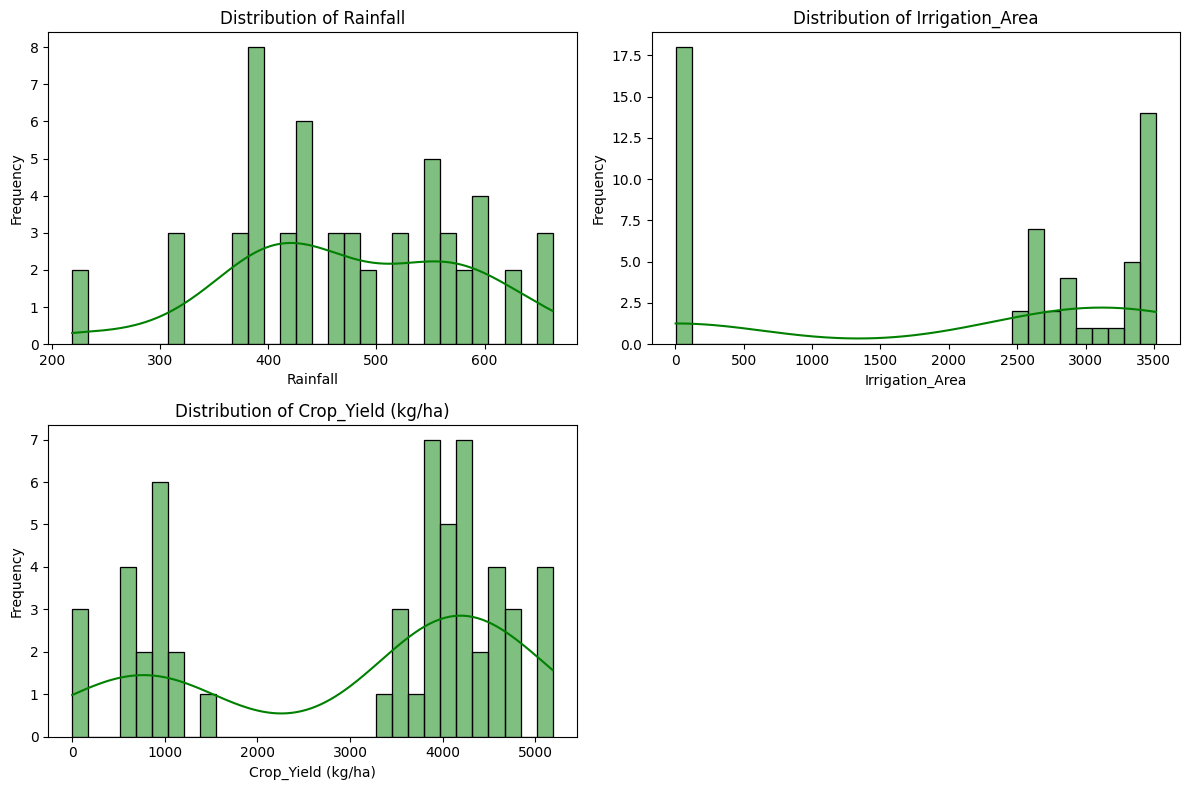

In [17]:
numerical_col = ['Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)']
plt.figure(figsize=(12, 8))  # Set the figure size for all subplots
plot_num = 1

for col in numerical_col:
    if plot_num <= 3:  # Limit the number of subplots to match the number of columns
        plt.subplot(2, 2, plot_num)  # Create a 2x2 grid of subplots
        sns.histplot(data=train_data, x=col, kde=True, bins=30, color='green')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plot_num += 1

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

- The distributions of rainfall, irrigation area, and crop yield show varying degrees of skewness, with rainfall being the most skewed, followed by irrigation area, and crop yield being relatively less skewed.

**2. What is the relationship between irrigation area and crop yield?**

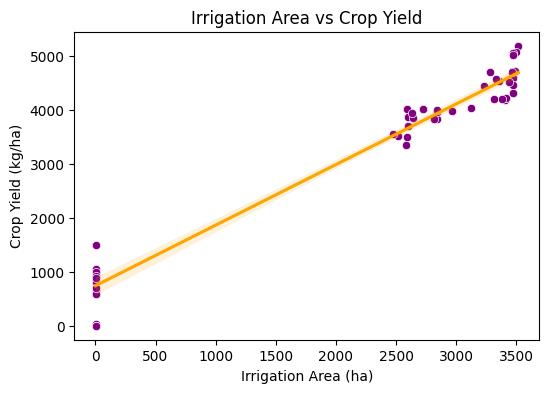

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Irrigation_Area', y='Crop_Yield (kg/ha)', color='purple')
sns.regplot(data=train_data, x='Irrigation_Area', y='Crop_Yield (kg/ha)', scatter=False, color='orange')
plt.title('Irrigation Area vs Crop Yield')
plt.xlabel('Irrigation Area (ha)')
plt.ylabel('Crop Yield (kg/ha)')
plt.show()

- The scatter plot and regression line show a positive correlation between irrigation area and crop yield, suggesting that increasing irrigation area tends to be associated with higher crop yields.

**Bivariate Analysis 🔗📉**

**4.How does rainfall affect crop yield?**

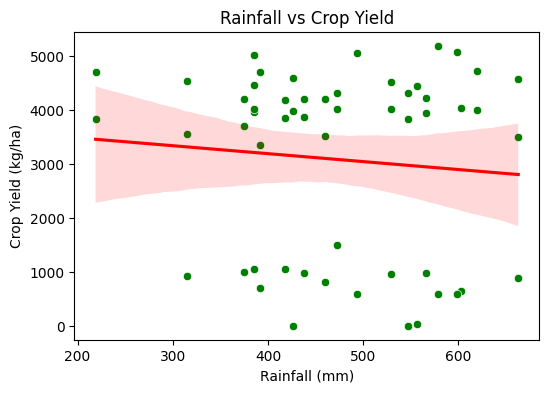

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Rainfall', y='Crop_Yield (kg/ha)', color='green')
sns.regplot(data=train_data, x='Rainfall', y='Crop_Yield (kg/ha)', scatter=False, color='red')
plt.title('Rainfall vs Crop Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield (kg/ha)')
plt.show()

- The relationship between rainfall and crop yield appears to be weak and negative, suggesting that higher rainfall may be associated with slightly lower crop yields

**5.Does crop yield vary by state, crop type, or soil type?**

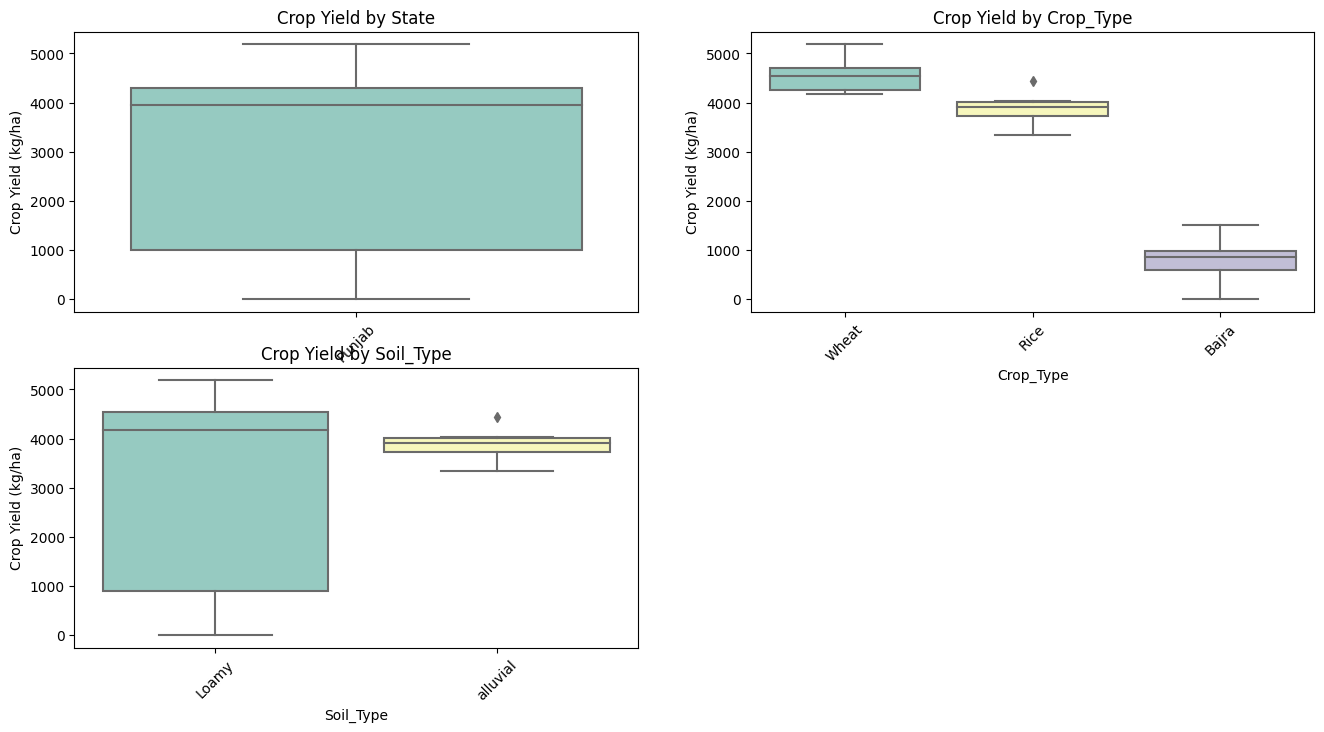

In [20]:
categorical_columns = ['State', 'Crop_Type', 'Soil_Type']
plt.figure(figsize=(16, 8))
plot_num=1
for col in categorical_columns:
    if plot_num<=3:
        plt.subplot(2,2,plot_num)
        sns.boxplot(data=train_data, x=col, y='Crop_Yield (kg/ha)', palette='Set3')
        plt.title(f'Crop Yield by {col}')
        plt.xlabel(col)
        plt.ylabel('Crop Yield (kg/ha)')
        plt.xticks(rotation=45)
        plot_num +=1
plt.show()

- Crop yield appears to be significantly influenced by crop type and soil type, but not by state.

**6.How has crop yield changed over the years?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


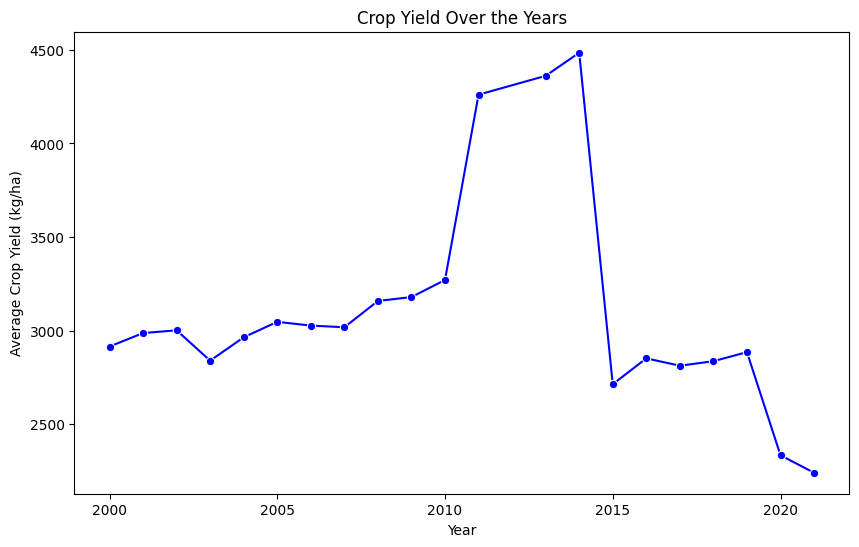

In [21]:
yearly_yield = train_data.groupby('Year')['Crop_Yield (kg/ha)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_yield, x='Year', y='Crop_Yield (kg/ha)', marker='o', color='blue')
plt.title('Crop Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (kg/ha)')
plt.show()

**Multivariate Analysis 📊🔬✨**

**7. How do rainfall and irrigation area together influence crop yield?**

In [22]:
import plotly.express as px

fig = px.scatter_3d(train_data, x='Rainfall', y='Irrigation_Area', z='Crop_Yield (kg/ha)', color='Crop_Type')
fig.update_layout(title='Rainfall, Irrigation Area, and Crop Yield')
fig.show()

- crop yield increases with both rainfall and irrigation area, but the extent of influence varies across crops, with wheat showing a stronger response compared to rice and bajra.

**8.How do different crop types perform in various states?**

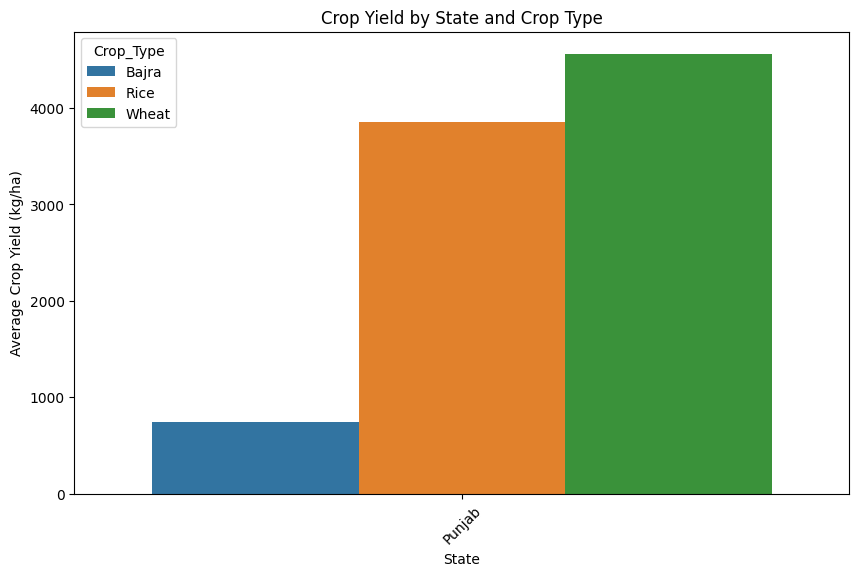

In [23]:
grouped_data = train_data.groupby(['State', 'Crop_Type'])['Crop_Yield (kg/ha)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='State', y='Crop_Yield (kg/ha)', hue='Crop_Type', palette='tab10')
plt.title('Crop Yield by State and Crop Type')
plt.xlabel('State')
plt.ylabel('Average Crop Yield (kg/ha)')
plt.xticks(rotation=45)
plt.show()

- within Punjab, Wheat has the highest average yield, followed by Rice, and then Bajra.

**9.Does soil type impact the effectiveness of irrigation or rainfall on crop yield?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1000x600 with 0 Axes>

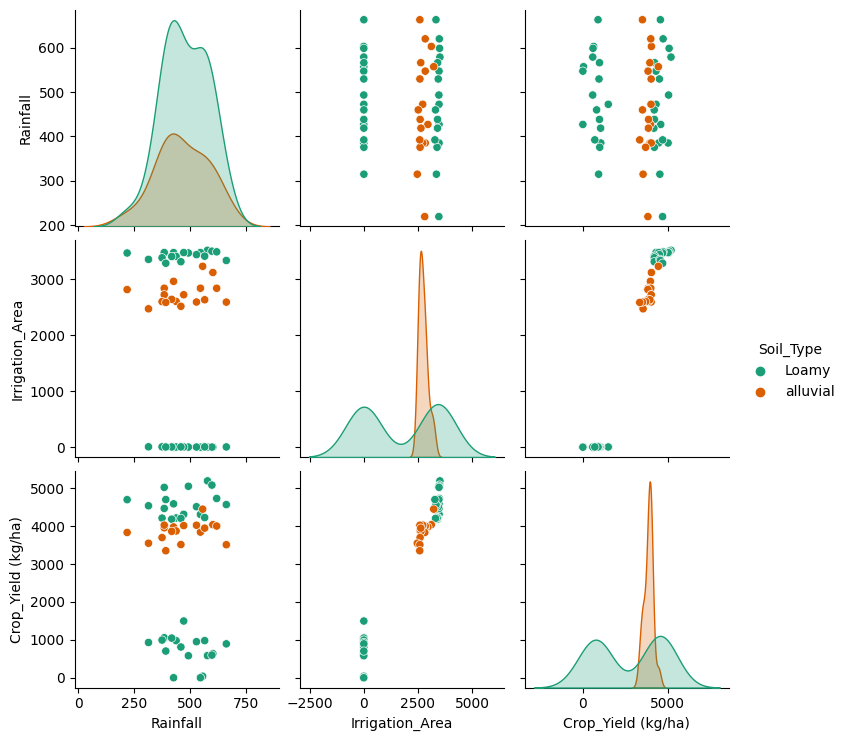

In [24]:
plt.figure(figsize=(10,6))
sns.pairplot(train_data, vars=['Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)'], hue='Soil_Type', palette='Dark2')
plt.show()

- loamy soil shows higher variability in rainfall impact on crop yield, while alluvial soil exhibits a concentrated relationship between irrigation area and yield, suggesting soil type influences the effectiveness of irrigation and rainfall differently.

**Correlation and Trends 🔗📈🔍**

**10. Is there a trend in crop yield over time across different states or crop types?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



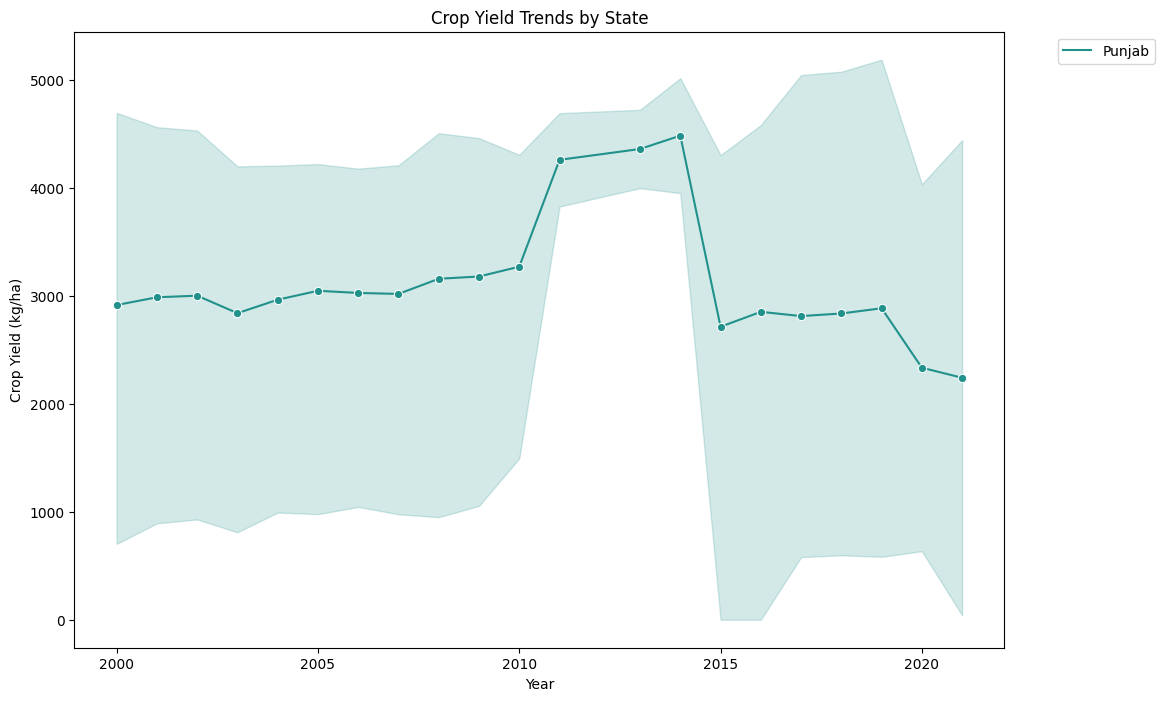

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=train_data, x='Year', y='Crop_Yield (kg/ha)', hue='State', marker='o', palette='viridis')
plt.title('Crop Yield Trends by State')
plt.xlabel('Year')
plt.ylabel('Crop Yield (kg/ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Crop yield showed a significant increase during the years 2010 to 2015, indicating a peak in agricultural productivity during this period. 🌾📈

**11.Which crops perform best under specific soil types and irrigation conditions?**

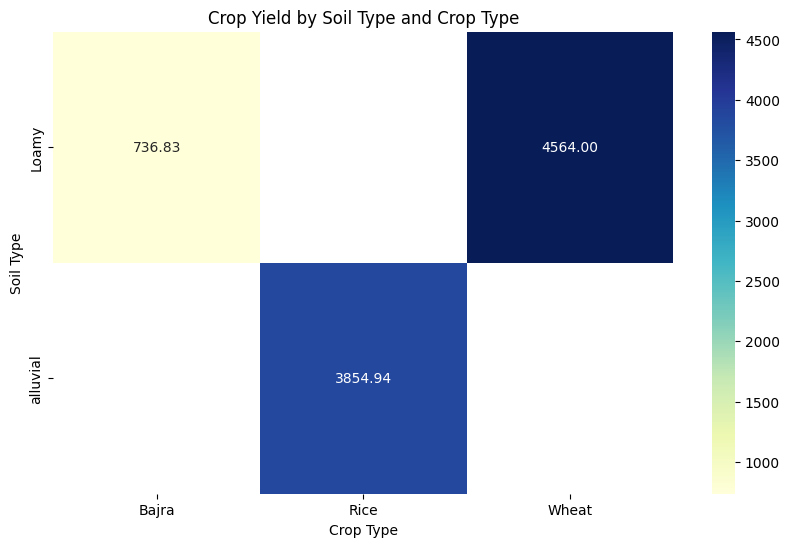

In [26]:
pivot_table = train_data.pivot_table(index='Soil_Type', columns='Crop_Type', values='Crop_Yield (kg/ha)', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Crop Yield by Soil Type and Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Soil Type')
plt.show()

- Wheat performs best in loamy soil (yield: 4564.00), while Rice performs best in alluvial soil (yield: 3854.94).

**12.What is the relative proportions of State, Crop_Type, and Soil_Type in the dataset**

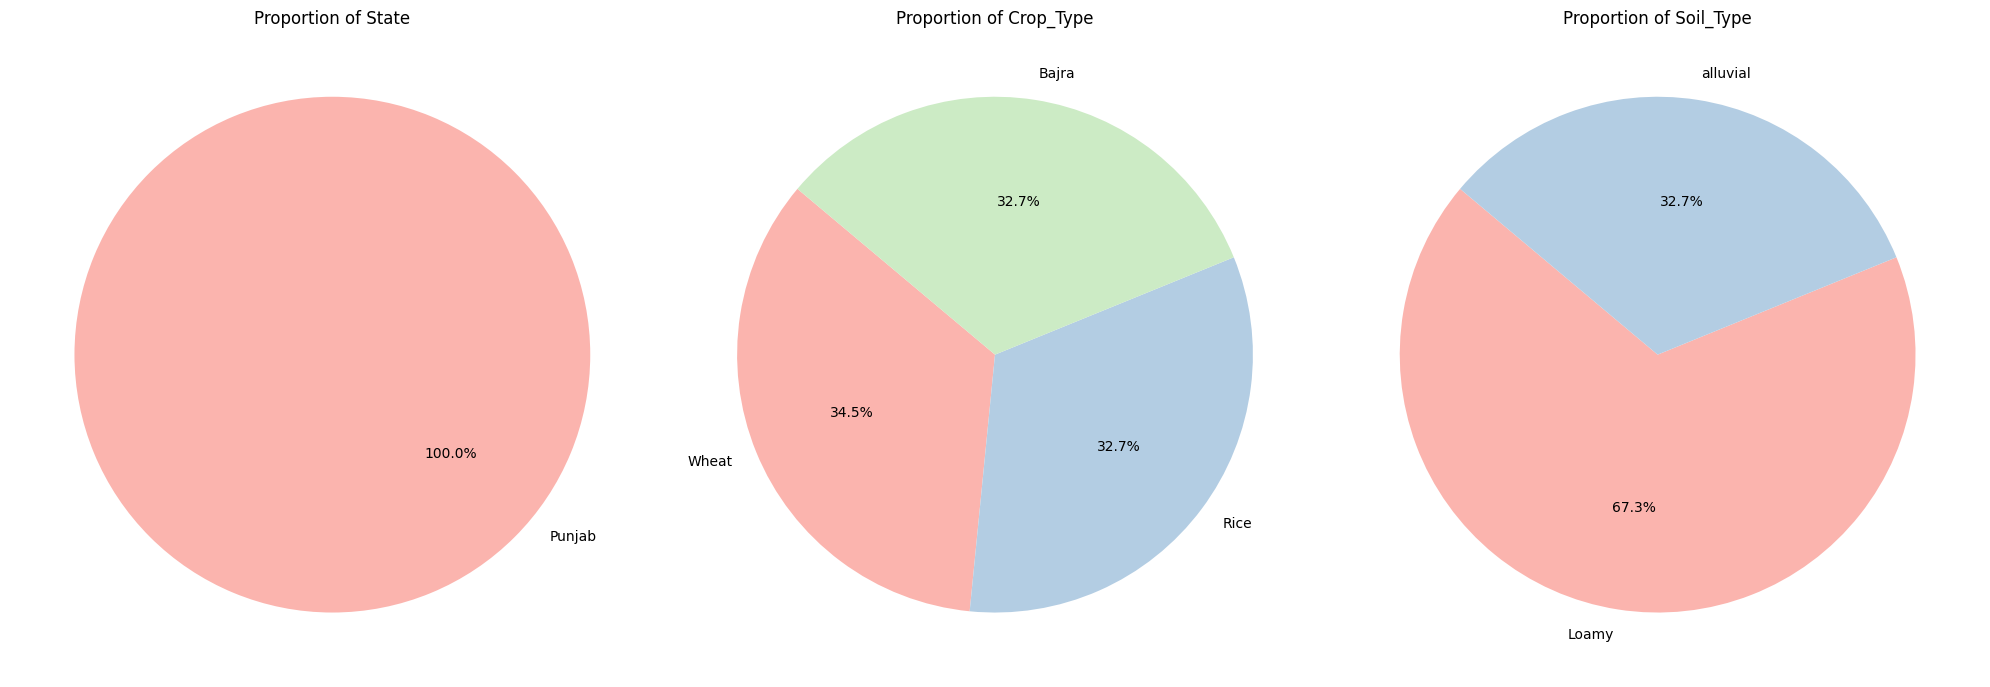

In [27]:
from matplotlib import cm
# Define categorical columns for pie chart
categorical_columns = ['State', 'Crop_Type', 'Soil_Type']

# Plotting pie charts
plt.figure(figsize=(20, 10))  # Set overall figure size
plot_num = 1
pastel_colors = cm.Pastel1.colors
for col in categorical_columns:
    plt.subplot(1, 3, plot_num)  # Create subplots
    data = train_data[col].value_counts()  # Get value counts for the column
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors[:len(data)])
    plt.title(f"Proportion of {col}")
    plot_num += 1

plt.tight_layout()
plt.show()

**13.What is the distribution of crop types across the dataset?**

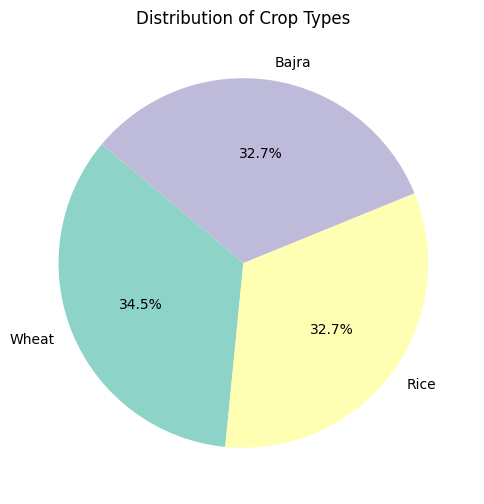

In [28]:
import matplotlib.pyplot as plt

# Data for crop types
crop_data = train_data['Crop_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crop_data, labels=crop_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors[:len(crop_data)])
plt.title("Distribution of Crop Types")
plt.show()

**14.How are soil types distributed in the dataset?**

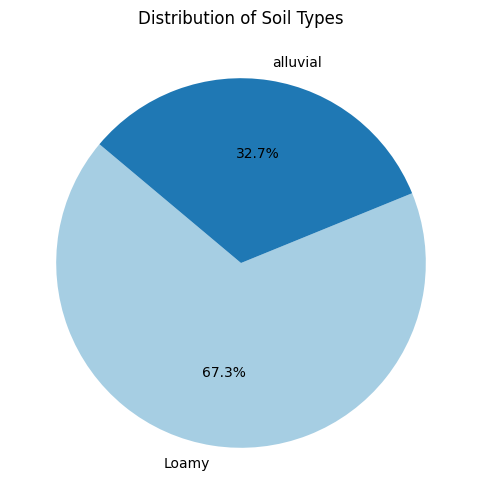

In [29]:
# Data for soil types
soil_data = train_data['Soil_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(soil_data, labels=soil_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors[:len(soil_data)])
plt.title("Distribution of Soil Types")
plt.show()

# **🛠️ Data Preprocessing**

**Missing Values:** After analyzing the dataset, we found no missing values in any of the columns.** ✅ Duplicate Values:** The dataset was also checked for duplicates, and none were found. ✅

**Since the data is clean, there is no need for further handling of missing or duplicate values. 🎉**

**1️⃣ Feature Encoding 🏷️**

In [30]:
categorical_cols=['State','Crop_Type','Soil_Type']
encoder={}
for feature in categorical_cols:
    
    encoder[feature]=LabelEncoder()
    train_data[feature]=encoder[feature].fit_transform(train_data[feature])
    test_data[feature]=encoder[feature].fit_transform(test_data[feature])

In [31]:
train_data

,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,2019,0,2,578.6,0,3515.2,5188
1,2018,0,2,598.3,0,3499.3,5077
2,2017,0,2,493.0,0,3467.7,5046
3,2016,0,2,426.7,0,3474.6,4583
4,2015,0,2,546.9,0,3474.7,4304
5,2014,0,2,384.9,0,3474.7,5017
6,2013,0,2,619.7,0,3488.1,4724
7,2011,0,2,218.9,0,3466.9,4693
8,2010,0,2,472.1,0,3474.8,4307
9,2009,0,2,384.9,0,3474.8,4462


**2️⃣ Feature Scaling 📏**

In [32]:
scaler=StandardScaler()
numerical_cols=['Rainfall','Irrigation_Area']
train_data[numerical_cols]=scaler.fit_transform(train_data[numerical_cols])     
test_data[numerical_cols]=scaler.transform(test_data[numerical_cols])

# **📐 Train-Test Split:**

In [33]:
X=train_data.drop('Crop_Yield (kg/ha)',axis=1)
y=train_data['Crop_Yield (kg/ha)']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **🤖 Model Training with K-Fold Cross-Validation on Multiple Models**

**🌟 Why K-Fold Cross-Validation?**

**🔍 Reliable Performance:** Ensures robust model evaluation, especially with limited data.

**🚫 Minimizes Overfitting:** Enhances generalization by validating on different data subsets.

In [35]:
# Define models
models = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate each model using k-fold cross-validation
for model_name, model in models.items():
    # K-fold Cross-Validation with 5 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Convert negative MSE to positive
    mean_mse = np.mean(-cv_scores)
    mean_r2 = np.mean(r2_scores)
    
    # Output results
    print(f'{model_name} mean MSE (using K-fold CV): {mean_mse}')
    print(f'{model_name} mean R2 score (using K-fold CV): {mean_r2 * 100:.2f}%','\n')


Ridge Regression mean MSE (using K-fold CV): 112762.98402924016
Ridge Regression mean R2 score (using K-fold CV): 95.58% 

Random Forest mean MSE (using K-fold CV): 78720.65075583334
Random Forest mean R2 score (using K-fold CV): 96.78% 

Decision Tree mean MSE (using K-fold CV): 123181.69722222225
Decision Tree mean R2 score (using K-fold CV): 94.39% 

XGBoost mean MSE (using K-fold CV): 117157.07430783598
XGBoost mean R2 score (using K-fold CV): 95.46% 



- **Random Forest shows the best balance between performance and generalization, with the highest R2 score and the lowest MSE. It is the preferred model for this task.**
  
- Ridge Regression is a strong contender, with impressive performance but slightly less accurate than Random Forest.


- XGBoost needs further tuning or might not be the best fit for this dataset, as it performs poorly compared to the other two models.

# **🎛️ Hyperparameter Tuning:**

- Optimize these hyperparameters using techniques like RandomizedSearchCV to identify the best configuration that minimizes error and enhances performance.
- The Random Forest Regressor was selected for hyperparameter tuning due to its strong initial performance.

In [36]:
param_grid={'n_estimators':[50,100,200,300],
            'max_depth':[None,10,20,30,40],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor(random_state=42)
random_search=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                                cv=5,scoring='neg_mean_squared_error',
                                verbose=2,n_jobs=-1,n_iter=50,random_state=42)
random_search.fit(X_train,y_train)
best_params=random_search.best_params_
best_model=random_search.best_estimator_
y_pred=best_model.predict(X_test)

# Output the results
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [37]:
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomForestRegressor(max_features='auto', min_samples_split=5,
                      n_estimators=200, random_state=42)

# **📊 Model Evaluation:**

In [38]:
y_pred=final_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test R2 Score: {r2score * 100:.2f}%")

Test MSE: 43991.71
Test R2 Score: 98.60%


- The model demonstrates excellent performance on crop yield prediction with a low Test MSE of 43991.71 and a high R² score of 98.60%, indicating accurate and reliable forecasts for agricultural decision-making.

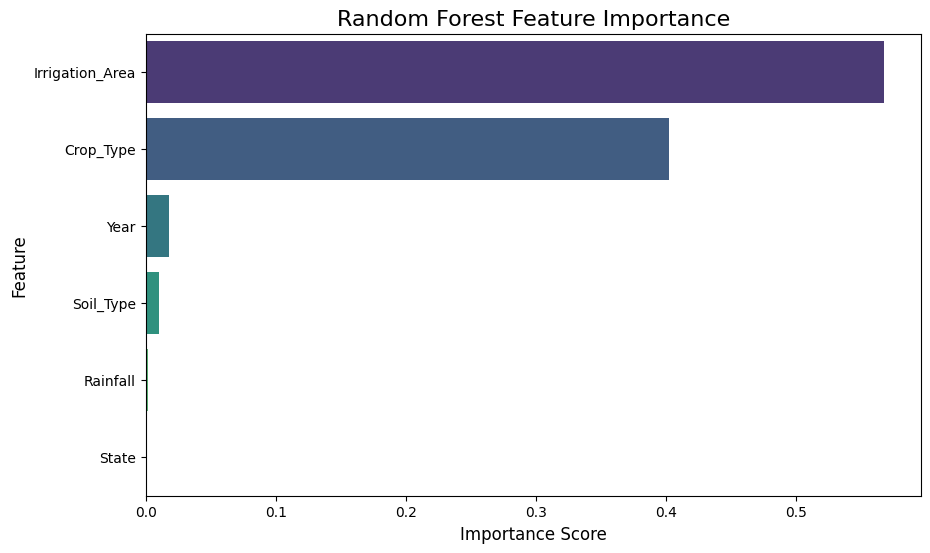

In [39]:
# Assuming final_model is your trained RandomForestRegressor
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with your feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df.head(10), 
    palette='viridis'  # You can use 'purple' or other palettes too
)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

- Irrigation_Area is the most significant factor, indicating that regions with well-managed irrigation contribute greatly to crop yield.
- Crop_Type_Bajra is the second most important feature, emphasizing that the crop type plays a crucial role in determining yield.

**These findings can guide agricultural strategies to focus on improving irrigation systems and selecting high-yielding crops like Bajra for specific regions to enhance productivity. Other factors like soil type and rainfall contribute marginally but should not be ignored entirely in decision-making**

# **📤 Submission:**

In [40]:
test_transformed=test_data.drop(columns=['id'])
output= pd.DataFrame(test_data['id'])
rf_output = final_model.predict(test_transformed)
output['Crop_Yield (kg/ha)']= rf_output
output.to_csv("/kaggle/working/submission.csv", index = None)
output

,id,Crop_Yield (kg/ha)
0,1001,5032.226986
1,1002,5059.171677
2,1003,4009.524870
3,1004,3986.989096
4,1005,3972.940921
5,1006,485.403587
6,1007,978.763059
7,1008,916.883169


# **🌾 Streamlit UI Implementation: 🌦️**

- A farmer-friendly crop yield predictor Link deployed on the cloud, providing real-time predictions based on user inputs.
- A GitHub link with project files (train.py, app.py, requirements.txt) for replication and deployment.

[Github Link](https://github.com/husanbano123/AI-in-agriculture)

[Crop Yield Predictor](https://ai-in-agriculture-deahzvcug7nuh9rcf4babh.streamlit.app/)

# **🔚 Conclusion:**

In this notebook, we conducted a thorough **Exploratory Data Analysis (EDA)** to derive valuable insights:

**🌦️ Numerical Features:** Uncovered patterns in rainfall, irrigation area, and crop yield distributions.
🌱 Categorical Features: Analyzed diversity across states, crop types, and soil types.

**📊 Visualizations:** Explored proportional distributions (pie charts), input-output relationships, and temporal yield trends.

**💡 Correlations:** Identified critical feature interactions to inform predictive modeling.

**Model Performance:**

🔧 After hyperparameter tuning with RandomizedSearchCV:

📉 **MSE** improved significantly from **80,530.76** to **43,991.71**.
📈 **R²** Score increased from **96.86%** to **98.60%**.
Key features like rainfall, soil type, and irrigation contributed to improved accuracy and reliability.

**Streamlit UI Implementation:**
We developed a **farmer-friendly** interface where users can input parameters like **Soil Type, Crop Type, Year, Irrigated Area, MSP, and Sack Size** to predict:

**🌾 Crop Yield (kg/ha)**

**📦 Equivalent Sacks Required**

**💰 Estimated Revenue**

At the beginning of this notebook, we included:

- A **Crop Yield Predictor UI Link** of the deployed UI for reference.
- A **GitHub** link with project files (train.py, app.py, requirements.txt) for replication and deployment.
  
These results mark a significant step towards leveraging AI for enhancing agricultural productivity. 🚜✨

# **🚀 If you found this notebook helpful, insightful, or inspiring, I would truly appreciate your upvote! Your support can help bring this notebook to the spotlight and make it shine in the competition🏆✨**

# **Thank you for your time and encouragement! 😊**